# 1. [30] If there's no asparagus in Innopolis...

When you find something that you like - whether it is a poem, song, or image, it's often useful to have an option to find similar items, such that you can enjoy songs of the same kind, for example. For this there exist **recommender systems**, and we will build one today. Given a dataset on nutrition of some products, you will be able to search for similar ones, e.g. for replacement in your daily meal: what if you don't have good asparagus in Innopolis?

The recommender system will be based on the vector-space model + dimensionality reduction + cosine similarity measure.

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.1. Reading the dataset

Next block reads the data from a CSV dataset: https://raw.githubusercontent.com/IUCVLab/information-retrieval/main/datasets/nutrition.csv

You can also see this data on GitHub as a beatuful table https://github.com/IUCVLab/information-retrieval/blob/main/datasets/nutrition.csv

In [ ]:
# you will need internet connection for this block
csv_url = "https://raw.githubusercontent.com/IUCVLab/information-retrieval/main/datasets/nutrition.csv"
dataset = pd.read_csv(csv_url)

# there are no (0) saturated fats in vegetables, that's why we replace N/A values with 0
dataset = dataset.fillna(0)

classes_list = dataset["Food Type"][1:].values
names = dataset["Food and Serving"][1:].values
dimensions = dataset.columns[1:]

print("Names:", *names[:5], "...", sep=" | ")
print()
print("Classes:", *set(classes_list), sep=" | ")
print()
print("Dimensions:", *dimensions[:5], "...", sep=" | ")

dataset.head()

Names: | Asparagus, 5 spears (93 g/3.3 oz) | Bell Pepper, 1 medium (148 g/5.3 oz) | Broccoli, 1 medium stalk (148 g/5.3 oz) | Carrot, 1 carrot, 7" long, 1 1/4" diameter (78 g/2.8 oz) | Cauliflower, 1/6 medium head (99 g/3.5 oz) | ...

Classes: | Vegetables, Serving Size (gram weight/ ounce weight) | Fruits Serving Size (gram weight/ounce weight) | Seafood, Serving Size (84 g/3 oz)

Dimensions: | Calories | Calories from Fat | Total Fat 1 | Total Fat 2 | Sodium 1 | ...


,Food and Serving,Calories,Calories from Fat,Total Fat 1,Total Fat 2,Sodium 1,Sodium 2,Potassium 1,Potassium 2,Total Carbo-hydrate 1,Total Carbo-hydrate 2,Dietary Fiber 1,Dietary Fiber 2,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat 2,Chole-sterol 1,Chole-sterol 2,Food Type
0,0,0.0,0.0,(g),(%DV),(g),(%DV),(g),(%DV),(g),(%DV),(g),(%DV),(g),(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),0
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,1,2,8,2,2,10,15,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,2,2,8,4,1,4,190,2,4,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,3,3,12,2,4,6,220,6,6,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,2,2,8,5,1,110,10,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."


## 1.2. Assigning colors each food item
Building a `color_list` which attributes a color to each item.

In [ ]:
classes = list(set(classes_list))
colors = ["red", "green", "blue", "black", "magenta"]
class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = colors[i % len(colors)]
    
print(class_colors)
color_list = [class_colors[a] for a in classes_list]

{'Vegetables, Serving Size (gram weight/ ounce weight)': 'red', 'Fruits Serving Size (gram weight/ounce weight)': 'green', 'Seafood, Serving Size (84 g/3 oz)': 'blue'}


## 1.3. Plotting functions

We will use these functions to visualize data in 2D and 3D.

In [ ]:
def show_points_2d(X, Y, xaxis, yaxis):
    global names, classes_list, class_colors
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    classes = set()
    for x, y, name, label in zip(X, Y, names, classes_list):
        if not label in classes:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label], label=label)
            classes.add(label)
        else:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label])
        plt.text(x, y, name)
    plt.legend()
    plt.axvline(0)
    plt.axhline(0)
    plt.show()
    
def show_points_3d(X, Y, Z):
    global color_list
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    for x, y, z, color in zip(X, Y, Z, color_list):
        ax.scatter([x], [y], [z], marker='o', color=color)
    plt.show()
    
def show_matrix(A, xaxis, yaxis):
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.imshow(A)
    plt.show()    

## 1.4. Data Visualization
Matrix `A` will hold numerical data from dataset. It has (61 items)x(22 features) size. In "real" tasks this could be (1B users)x(300 features). In such case each additional feature would cost 8GB of storage. It can be a good idea to cut redundant dimensions.

Raw values, columns are objects (61, 22)


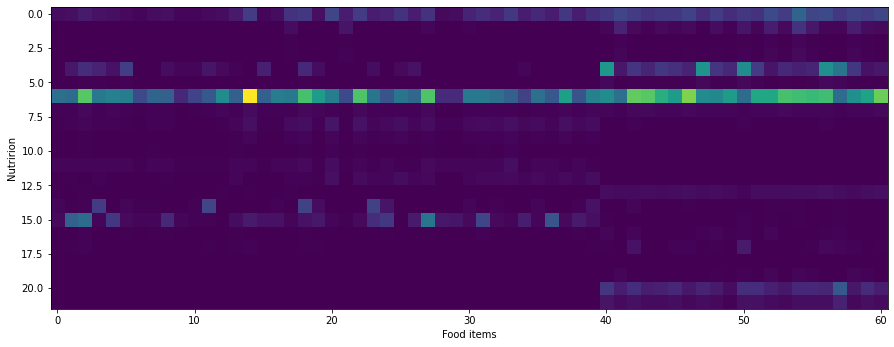

2 random dimensions distribution


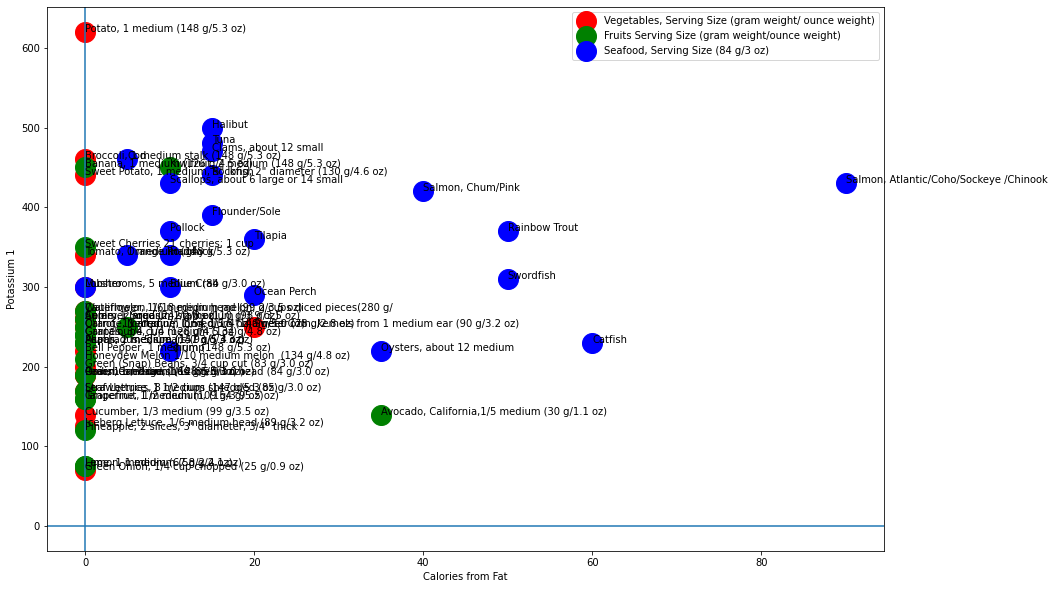

In [ ]:
A = np.array(dataset.values[1:,1:-1].astype(float))
print("Raw values, columns are objects", A.shape)
show_matrix(A.T, "Food items", "Nutririon")

print("2 random dimensions distribution")
show_points_2d(A.T[1], A.T[6], dimensions[1], dimensions[6])

## 1.5. [10] Dimensionality reduction with Principal Components Analysis
Principal components are the dimensions, which express dataset diversity in the best way: the variance is maximized along these dimensions. Thus, we can keep only most valuable ones if we are sure they distiguish our data well. Let's keep 3 principal components. **Fill in the code to apply PCA to our data**.

In [ ]:
from sklearn.decomposition import PCA
k = 3
pca = PCA(k)
#TODO apply PCA to matrix A, and save the results to Ak
Ak = pca.fit_transform(A)
Ak.shape

(61, 3)

Check how much variance is explained by the first `k` components. Refer to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
#TODO print ratios of variance explained by the first k components
# One line of code to print out the results
print(pca.explained_variance_ratio_)

[0.56816006 0.24450404 0.09653148]


Now, let's **visualize** the data after transformation applied.

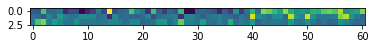

2 first dimensions


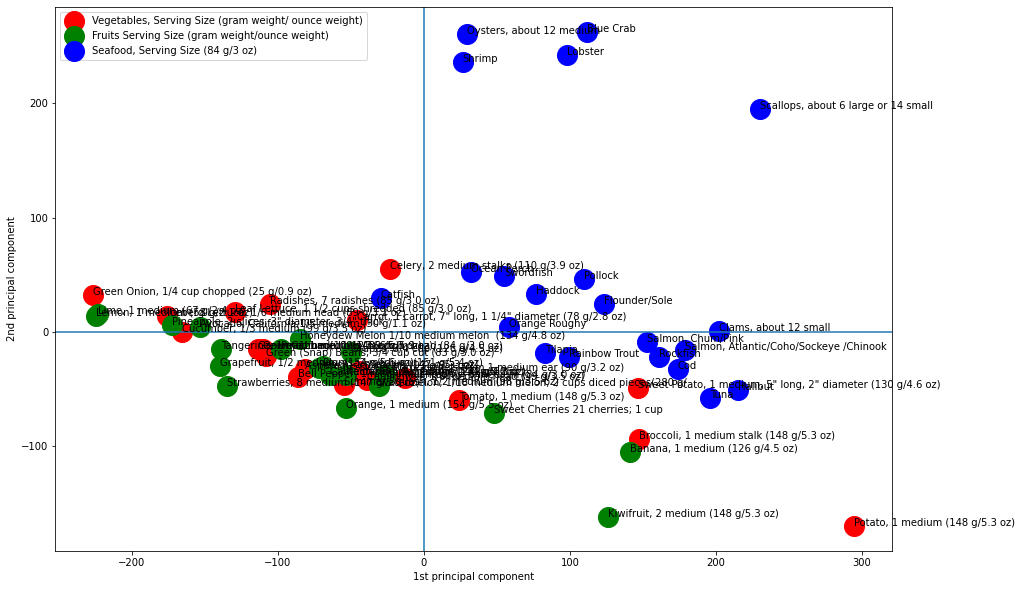

3 first dimensions


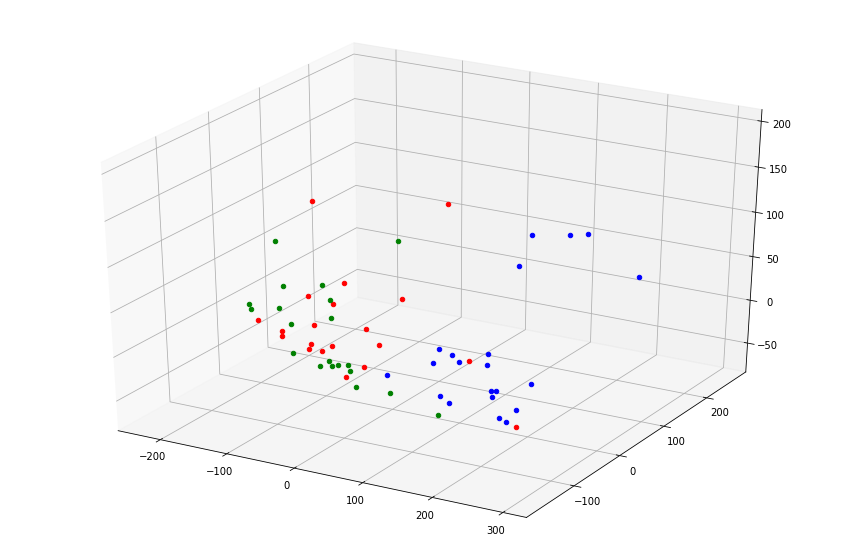

In [ ]:
plt.imshow(Ak.T)
plt.show()

print("2 first dimensions")
show_points_2d(Ak.T[0], Ak.T[1], "1st principal component", "2nd principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0], Ak.T[1], Ak.T[2])

## 1.6. [10] Norming
It can happen, that some food is more "watered" than the others. See, how different are celery and popatos in terms of calories. Thus, the norm of each item in dataset can be different, and we cannot easily use $L_2$ distance to estimate the difference. But what we can use - [*cosine similarity*](https://en.wikipedia.org/wiki/Cosine_similarity). Cosine similarity shows, how 2 items are "about the same" even if nutrition is of different scale. Look at the formula of cosine similarity: you will find out that if both vectors are **normed**, then $cos(a, b) = a\cdot b$.

**Thus, your task is to norm the dataset vector-wise (row-wise).**

2 first dimensions


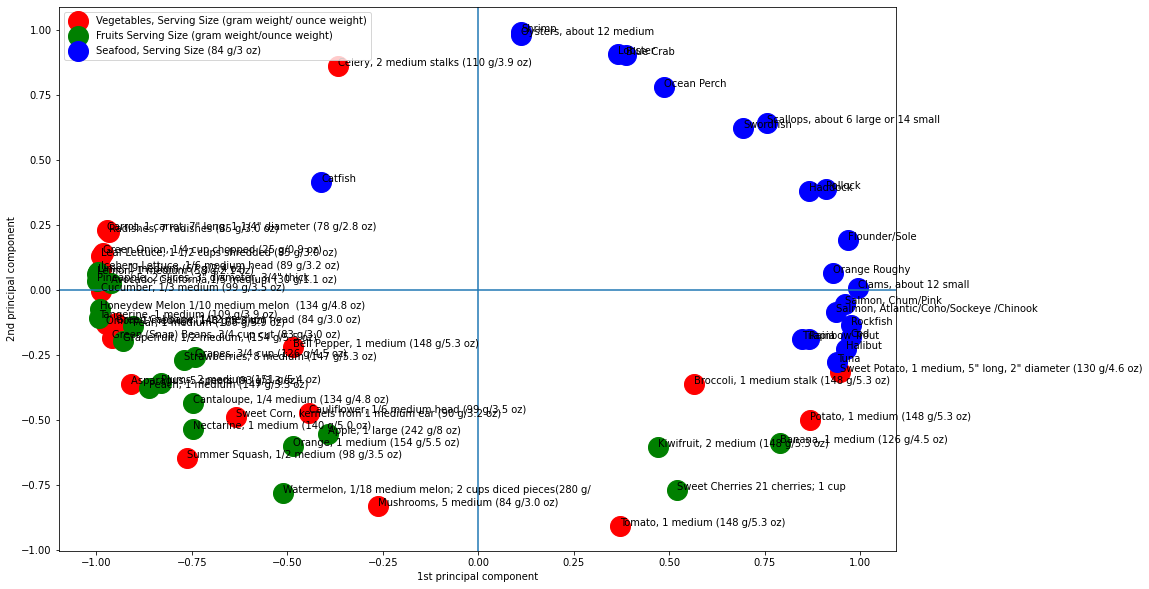

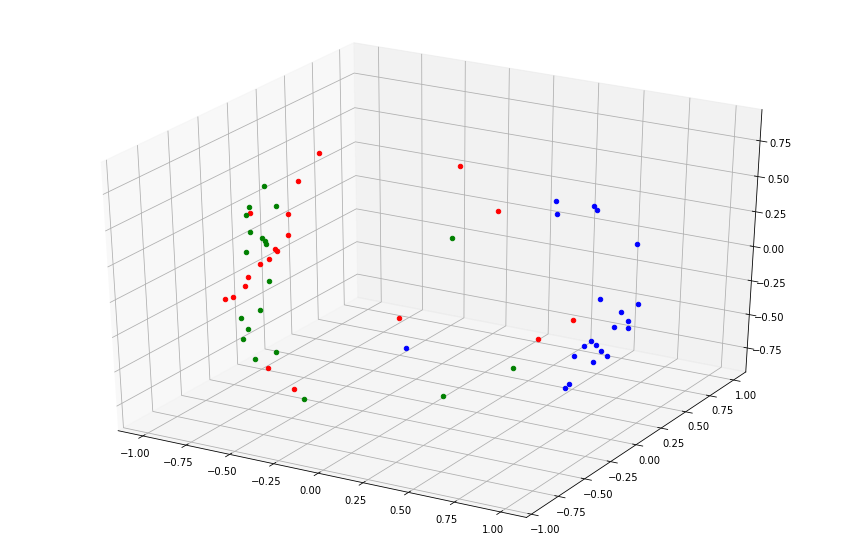

In [ ]:
def norm_vectors(A):
    An = A.copy()
    #TODO write here a code that will norm each vector, 
    # i.e. will divide each row of A by its L2 norm ||A[i]||
    """
    Normalize the data
    fill this function
    3 lines of code
    """
    for i in range(len(An)):
        norm = np.linalg.norm(An[i])
        An[i, :] /= norm
    return An
    
An = norm_vectors(Ak)

print("2 first dimensions")
show_points_2d(An.T[0], An.T[1], "1st principal component", "2nd principal component")
show_points_3d(An.T[0], An.T[1], An.T[2])

## 1.7. [10] Recommendations
And now the last step left. You represented the data with 3-dimensoinal vectors, instead of 22-dimensional. But we still need the code that will recommend closest food items in terms of nutrition. 

**Please, write the code that will return $k$ closest food items to the provided query vector.**

In [ ]:
def find_k_closest(query, dataset, k=5):    
    #TODO write here the code that will find 5 closest rows in dataset in terms of cosine similarity
    #HINT: as vectors in dataset are already normed, cosine similarity is just a dot product.
    index = []
    for i in range(len(dataset)):
      val = dataset[i]
      index.append((i, val, np.dot(query, val)))

    sortedIndex = sorted(index, key=lambda pair: pair[2], reverse=True)[:k]
    
    return sortedIndex

recommend_to = 0
r = find_k_closest(An[recommend_to,:], An)


print("For:", names[recommend_to])
for k, v, p in r:
    if recommend_to != k: # exclude itself 
        print("\t", names[k], "sim =", p)

For: Asparagus, 5 spears (93 g/3.3 oz)
	 Peach, 1 medium (147 g/5.3 oz) sim = 0.9900306633803702
	 Green (Snap) Beans, 3/4 cup cut (83 g/3.0 oz) sim = 0.9830960808594849
	 Plums, 2 medium (151 g/5.4 oz) sim = 0.9740244451806315
	 Onion, 1 medium (148 g/5.3 oz) sim = 0.9705752498785493


## 1.8. (Extra task) Try this on text data

Now, it's time to check how well does this work for text data. 
1. Load the inverted index you built [at the last lab](2021S-0506%20Index%20and%20Spellchecking.ipynb) with other files needed for the task; 
2. Using these files, build Document-Term Matrix (DTM), where each row is a document, and each column is a term, and at the intersection there's a TF-IDF value;
3. Apply the same procedure as above: **PCA transform + normalization**. Choose the number of dimensions to preserve at least 90\% of variance.
4. Apply similar procedure: **SVD transform + normalization**. Use the same number of dimensions.
5. For a given article (print its url) show urls of 5 closest articles using cosine similarity. Are results different for 3 and 4?
6. Similarly, show urls of closest articles to a short query, such as "last grammy award".

Display cosine similarity for all search results along with urls.


In [ ]:
# Place for your code here
"""
+1 to course total
apply pca to the text data

"""
import pickle
import os
# load index, doc_lengths and doc_urls
with open('inverted_index.p', 'rb') as fp:
    index = pickle.load(fp)
with open('doc_lengths.p', 'rb') as fp:
    doc_lengths = pickle.load(fp)
with open('doc_urls.p', 'rb') as fp:
    doc_urls = pickle.load(fp)

In [ ]:
import math
# code for dtm

In [ ]:
from sklearn.decomposition import PCA
k = 5
pca_t = PCA(n_components=k)
dtm_k = pca_t.fit_transform(tdm)
print("shape", dtm_k.shape)
print("explained_variance", sum(pca_t.explained_variance_ratio_))

In [ ]:
import nltk
from nltk import word_tokenize

nltk.download('punkt')

class Preprocessor:
    
    def __init__(self):
        self.stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its',
                      'of', 'on', 'that', 'the', 'to', 'was', 'were', 'will', 'with'}
        self.ps = nltk.stem.PorterStemmer()

    
    def tokenize(self, text):
        #TODO word tokenize text using nltk lib
        Ttext = word_tokenize(text)
        return Ttext

    
    def stem(self, word, stemmer):
        #TODO stem word using provided stemmer
        st = stemmer.stem(word)
        return st

    
    def is_apt_word(self, word):
        #TODO check if word is appropriate - not a stop word and isalpha, 
        # i.e consists of letters, not punctuation, numbers, dates
        val = False
        if word not in self.stop_words and word.isalpha():
          val = True
        return val

    
    def preprocess(self, text):
        #TODO combine all previous methods together: tokenize lowercased text 
        # and stem it, ignoring not appropriate words
        tokens = self.tokenize(text)
        ret = []
        for token in tokens:
          if self.is_apt_word(token.lower()):
            ret.append(self.stem(token, self.ps))
        return ret

# 2. [70] Evolving vector-space model
This lab will be devoted to the use of `doc2vec`/... model for the needs of information retrieval and text classification.  

## 2.1. [40] Searching in the curious facts database
The facts dataset is given [here](https://raw.githubusercontent.com/IUCVLab/information-retrieval/main/datasets/facts.txt), take a look.  We want you to retrieve facts **relevant to the query** (whatever it means), for example, you type "good mood", and get to know that Cherophobia is the fear of fun. For this, the idea is to utilize document vectors. However, instead of forming vectors with tf-idf and reducing dimensions, this time we want to obtain fixed-size vectors for documents using `doc2vec` ML model.

### 2.1.1. Loading trained `doc2vec` model

First, let's load the pre-trained `doc2vec` model from https://github.com/jhlau/doc2vec (Associated Press News DBOW (0.6GB)), and install dependency.

Unpack a model into 3 files and target the main one in your code:
```
doc2vec.bin  <---------- this
doc2vec.bin.syn0.npy
doc2vec.bin.sin1neg.npy
```

In [ ]:
!pip install gensim

In [ ]:
from gensim.models.doc2vec import Doc2Vec

drivePath = "/content/drive/MyDrive/AIR/"

model = Doc2Vec.load(drivePath + 'doc2vec.bin', mmap=None)
print(type(model))
print(type(model.infer_vector(["to", "be", "or", "not"])))

<class 'gensim.models.doc2vec.Doc2Vec'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


### 2.1.2. [10] Reading data

Now, let's read the facts dataset. Download it from the abovementioned url and read to the list of sentences.

In [ ]:
#TODO read facts into a list of facts
"""
read the data
"""
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/IUCVLab/information-retrieval/main/datasets/facts.txt", "lalala.txt")

facts = []

with open("lalala.txt") as fp:
      facts = fp.read().split('\n')

### 2.1.3. Tests

In [ ]:
print(*facts[:5], sep='\n')

assert len(facts) == 159
assert ('our lovely little planet') in facts[0]

1. If you somehow found a way to extract all of the gold from the bubbling core of our lovely little planet, you would be able to cover all of the land in a layer of gold up to your knees.
2. McDonalds calls frequent buyers of their food "heavy users."
3. The average person spends 6 months of their lifetime waiting on a red light to turn green.
4. The largest recorded snowflake was in Keogh, MT during year 1887, and was 15 inches wide.
5. You burn more calories sleeping than you do watching television.


### 2.1.4. [10] Transforming sentences to vectors

Transform the list of facts to `numpy.array` of vectors corresponding to each document (`sent_vecs`), inferring them from the model we just loaded.

In [ ]:
#TODO infer vectors
"""
transform the list to vectors using numpy array
"""
import nltk
import numpy as np

nltk.download('punkt')

sent_vecs = []
for sen in facts:
  words = nltk.word_tokenize(sen.lower())
  sent_vecs.append(model.infer_vector(words))

sent_vecs = np.array(sent_vecs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 2.1.5. Tests 

In [ ]:
print(sent_vecs.shape)
assert sent_vecs.shape == (159, 300)

(159, 300)


### 2.1.6. [10] Find closest

Now find 5 facts which are closest to the query using cosine similarity measure.

In [ ]:
#TODO output closest facts to the query
"""
5 closet facts using cosine similarity measure
"""
def norm_vectors(A):
    An = A.copy()
    for i in range(len(An)):
        norm = np.linalg.norm(An[i])
        An[i, :] /= norm
    return An

def find_k_closest(query, dataset, k=5):    
    index = []
    for i in range(len(dataset)):
      index.append((i, v, np.dot(query, dataset[i])))
      
    sortedIndex = sorted(index, key=lambda pair: pair[2], reverse=True)[:k]
    
    return sortedIndex

sent_vecs_normed = norm_vectors(sent_vecs)

query = "good mood"

query_vec = model.infer_vector(nltk.word_tokenize(query))
query_vec_normed = query_vec/np.linalg.norm(query_vec)
r = find_k_closest(query_vec_normed, sent_vecs_normed)

print("Results for query:", query)
for k, v, p in r:
    print("\t", facts[k], "sim=", p)

Results for query: good mood
	 68. Cherophobia is the fear of fun. sim= 0.57374203
	 144. Dolphins sleep with one eye open! sim= 0.54473686
	 45. About half of all Americans are on a diet on any given day. sim= 0.51639456
	 41. Blueberries will not ripen until they are picked. sim= 0.5132726
	 18. You cannot snore and dream at the same time. sim= 0.51310927


### 2.1.7. [10] Measure pFound@5 and mAP@5 for the following query bucket:
```
good mood
gorilla
woman
earth
japan
people
math
```

In [ ]:
# write your code here
"""
pFound and mAP for the query bucket
"""
# def mean_avg_precision(search_results, relevance):
#     # TODO: calculate MAP score for search results, treating relevance judgments as binary - either relevant or not.
#     #
#     # search_results: list of lists of ranked results for each query [[doc_id1, doc_id2,...], ...]
#     # note that for tests to pass, the i-th result in search_results should correspond to (i+1)-th query_id.  
#     # relevance: dict, query_id:[(relevant_doc_id1, score1), (relevant_doc_id2, score2), ...]       

#     Q = len(search_results)

#     avp = []
#     for j in range(0, Q):
#       truePositive = []
#       positiveCounter = []
#       # print(relevance[j+1])
#       print(len(relevance))
#       print(search_results[j])
#       for x in relevance[j+1]:
#         truePositive.append([x[0], search_results[j].index(x[0])+1])
#       truePositive=sorted(truePositive, key=lambda x:x[1])    
#       # print(truePositive)

#       for item in truePositive:
#         item[0] = truePositive.index(item)+1
#         positiveCounter.append(item[0] / item[1])
      
#       if (positiveCounter):
#         avp.append(sum(positiveCounter)/len(positiveCounter))
#       else:
#         avp.append(0)
    
#     mapQ = sum(avp)/len(avp)
#     return mapQ

# maps = []
# queryBucket = ["good mood", "gorilla", "woman", "earth", "japan", "people", "math"]
# for query in queryBucket:
#   query_vec = model.infer_vector(nltk.word_tokenize(query))
#   query_vec_normed = query_vec/np.linalg.norm(query_vec)
#   r = find_k_closest(query_vec_normed, sent_vecs_normed)
#   r1 = find_k_closest(query_vec_normed, sent_vecs_normed, k = 1)
#   print(query, len(query_vec_normed), r, r1)
#   maps = mean_avg_precision(r, r1)


'\npFound and mAP for the query bucket\n'

## 2.2. [30] Training doc2vec model and documents classifier

Now you will to train doc2vec model yourself based on [this topic-modeling dataset](https://code.google.com/archive/p/topic-modeling-tool/downloads). It is also cloned in your repository: [just unpack](https://github.com/IUCVLab/information-retrieval/blob/main/datasets/topic-modelling.zip).

### 2.2.1. [10] Read dataset

First, read the dataset - it consists of 4 parts, you need to merge them into single list. 

In [133]:
#TODO read the dataset into list
"""
just read data
"""
def read_dataset(file_path):
    docs = []
    with open(file_path) as fp:
        for cnt, line in enumerate(fp):
            docs.append(nltk.word_tokenize(line))
    return docs

drivePath = "/content/drive/MyDrive/AIR/"

fuel_data = read_dataset(drivePath + "testdata_news_fuel_845docs.txt")
brain_inj_data = read_dataset(drivePath + "testdata_braininjury_10000docs.txt")
economy_data = read_dataset(drivePath + "testdata_news_economy_2073docs.txt")
music_data = read_dataset(drivePath + "testdata_news_music_2084docs.txt")

all_data = []
all_data.extend(fuel_data)
all_data.extend(brain_inj_data)
all_data.extend(economy_data)
all_data.extend(music_data)

### 2.2.2. Test reading

In [134]:
print(len(all_data))
assert len(all_data) == 15002

15002


## 2.3. Training your own `doc2vec` model

Train a `doc2vec` model based on the dataset you've loaded. The oversimplified example of training is provided.

### 2.3.1. Training example

In [135]:
#TODO change this according to the task
# small set of tokenized sentences
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# just a test set of tokenized sentences
print(common_texts, "\n")
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents, "\n")
# train a model
model_new = Doc2Vec(
    documents,     # collection of texts
    vector_size=5, # output vector size
    window=2,      # maximum distance between the target word and its neighboring word
    min_count=1,   # minimal number of 
    workers=4      # in parallel
)

# clean training data
model_new.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# save and load
model_new.save("d2v.model")
model_new = Doc2Vec.load("d2v.model")

vec = model_new.infer_vector(["system", "response"])
print(vec)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']] 

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])] 

[ 0.00031153  0.09984328 -0.02440549 -0.05639766 -0.00326551]


### 2.3.2. [10] Form train and test datasets

Transform documents to vectors and split data to train and test sets. Make sure that the split is stratified as the classes are imbalanced.

In [136]:
#TODO transform and make a train-test split
"""
Just small training on the dataset loaded
split to train and test
"""
from sklearn.model_selection import train_test_split

# Setting up labels for data
all_labels = np.zeros((len(all_data))) # 0 for music
all_labels[:len(fuel_data)] = 1 # 1 for fuel Data
all_labels[len(fuel_data):len(fuel_data) + len(brain_inj_data)] = 2 # 2 for Brain injury Data
all_labels[len(fuel_data) + len(brain_inj_data): len(fuel_data) + len(brain_inj_data) + len(economy_data)] = 3 # 3 for economy Data

# making vectors of data
all_data_vecs = np.array(list(model.infer_vector(sent) for sent in all_data))

# splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(all_data_vecs, all_labels, test_size=0.33, 
                                                    random_state=0, stratify=all_labels)

### 2.3.3. [10] Train topics classifier

Train a classifier that would classify any document to one of four categories: fuel, brain injury, music, and economy.
Print a classification report for test data.

In [137]:
#TODO train a classifier and measure its performance
"""

"""
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

base_model_report = classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"])

print(classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"]))

              precision    recall  f1-score   support

       music       0.79      0.88      0.83       688
        fuel       0.59      0.42      0.49       279
       brain       1.00      1.00      1.00      3300
     economy       0.76      0.75      0.76       684

    accuracy                           0.92      4951
   macro avg       0.78      0.76      0.77      4951
weighted avg       0.91      0.92      0.91      4951



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [145]:
from sklearn.metrics import f1_score
f1_baseModel = f1_score(y_test, y_pred, average='macro')
print(f1)

0.7686610900477088


Which class is the hardest one to recognize?

### 2.4. Bonus task

What if we trained our `doc2vec` model using window size = 5 or 10? Would it improve the classification acccuracy? What about vector dimensionality? Does it mean that increasing it we will achieve better performance in terms of classification?

Explore the influence of these parameters on classification performance, visualizing it as a graph (e.g. window size vs f1-score, vector dim vs f1-score).

In [146]:
# window size = 5
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# just a test set of tokenized sentences
print(common_texts, "\n")
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents, "\n")
# train a model
model_5 = Doc2Vec(
    documents,     # collection of texts
    vector_size=5, # output vector size
    window=5,      # maximum distance between the target word and its neighboring word
    min_count=1,   # minimal number of 
    workers=4      # in parallel
)

# clean training data
model_5.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# save and load
model_5.save("d2v.model")
model_5 = Doc2Vec.load("d2v.model")

vec_5 = model_5.infer_vector(["system", "response"])
print(vec_5)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']] 

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])] 

[ 0.00030318  0.09977886 -0.02442064 -0.05633733 -0.00326154]


In [147]:
#TODO train a classifier and measure its performance
"""

"""
from sklearn.metrics import f1_score
# making vectors of data
all_data_vecs = np.array(list(model_5.infer_vector(sent) for sent in all_data))

# splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(all_data_vecs, all_labels, test_size=0.33, 
                                                    random_state=0, stratify=all_labels)

from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

model_5_report = classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"])
f1_Model_5 = f1_score(y_test, y_pred, average='macro')
print(f1_Model_5)

print(classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"]))

0.1999757605138771
              precision    recall  f1-score   support

       music       0.00      0.00      0.00       688
        fuel       0.00      0.00      0.00       279
       brain       0.67      1.00      0.80      3300
     economy       0.00      0.00      0.00       684

    accuracy                           0.67      4951
   macro avg       0.17      0.25      0.20      4951
weighted avg       0.44      0.67      0.53      4951



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
# window size = 10
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# just a test set of tokenized sentences
print(common_texts, "\n")
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents, "\n")
# train a model
model_10 = Doc2Vec(
    documents,     # collection of texts
    vector_size=5, # output vector size
    window=10,      # maximum distance between the target word and its neighboring word
    min_count=1,   # minimal number of 
    workers=4      # in parallel
)

# clean training data
model_10.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# save and load
model_10.save("d2v.model")
model_10 = Doc2Vec.load("d2v.model")

vec_10 = model_10.infer_vector(["system", "response"])
print(vec_10)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']] 

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])] 

[ 0.00030254  0.0997783  -0.02442154 -0.05633745 -0.00326131]


In [149]:
#TODO train a classifier and measure its performance
"""

"""
from sklearn.metrics import f1_score
# making vectors of data
all_data_vecs = np.array(list(model_10.infer_vector(sent) for sent in all_data))

# splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(all_data_vecs, all_labels, test_size=0.33, 
                                                    random_state=0, stratify=all_labels)

from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

model_10_report = classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"])
f1_Model_10 = f1_score(y_test, y_pred, average='macro')
print(f1_Model_10)

print(classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"]))

0.1999757605138771
              precision    recall  f1-score   support

       music       0.00      0.00      0.00       688
        fuel       0.00      0.00      0.00       279
       brain       0.67      1.00      0.80      3300
     economy       0.00      0.00      0.00       684

    accuracy                           0.67      4951
   macro avg       0.17      0.25      0.20      4951
weighted avg       0.44      0.67      0.53      4951



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# vector dim = 10, window size = 10
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# just a test set of tokenized sentences
print(common_texts, "\n")
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents, "\n")
# train a model
model_vec_10 = Doc2Vec(
    documents,     # collection of texts
    vector_size=10, # output vector size
    window=10,      # maximum distance between the target word and its neighboring word
    min_count=1,   # minimal number of 
    workers=4      # in parallel
)

# clean training data
model_vec_10.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# save and load
model_vec_10.save("d2v.model")
model_vec_10 = Doc2Vec.load("d2v.model")

vec_10_ = model_vec_10.infer_vector(["system", "response"])
print(vec_10_)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']] 

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])] 

[ 0.00015127  0.04988915 -0.01221077 -0.02816873 -0.00163065 -0.01167473
  0.01446363  0.03043128 -0.04545686 

In [151]:
#TODO train a classifier and measure its performance
"""

"""
from sklearn.metrics import f1_score
# making vectors of data
all_data_vecs = np.array(list(model_vec_10.infer_vector(sent) for sent in all_data))

# splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(all_data_vecs, all_labels, test_size=0.33, 
                                                    random_state=0, stratify=all_labels)

from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

model_v10_report = classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"])
f1_Model_v10 = f1_score(y_test, y_pred, average='macro')
print(f1_Model_v10)

print(classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"]))

0.1999757605138771
              precision    recall  f1-score   support

       music       0.00      0.00      0.00       688
        fuel       0.00      0.00      0.00       279
       brain       0.67      1.00      0.80      3300
     economy       0.00      0.00      0.00       684

    accuracy                           0.67      4951
   macro avg       0.17      0.25      0.20      4951
weighted avg       0.44      0.67      0.53      4951



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# vector dim = 10, window size = 5
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# just a test set of tokenized sentences
print(common_texts, "\n")
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents, "\n")
# train a model
model_vec_10_5 = Doc2Vec(
    documents,     # collection of texts
    vector_size=10, # output vector size
    window=5,      # maximum distance between the target word and its neighboring word
    min_count=1,   # minimal number of 
    workers=4      # in parallel
)

# clean training data
model_vec_10_5.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# save and load
model_vec_10_5.save("d2v.model")
model_vec_10_5 = Doc2Vec.load("d2v.model")

vec_10_5 = model_vec_10_5.infer_vector(["system", "response"])
print(vec_10_5)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']] 

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])] 

[ 0.00015159  0.04988943 -0.01221032 -0.02816867 -0.00163077 -0.01167471
  0.01446363  0.03043129 -0.04545719 

In [152]:
#TODO train a classifier and measure its performance
"""

"""
from sklearn.metrics import f1_score
# making vectors of data
all_data_vecs = np.array(list(model_vec_10_5.infer_vector(sent) for sent in all_data))

# splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(all_data_vecs, all_labels, test_size=0.33, 
                                                    random_state=0, stratify=all_labels)

from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

model_v105_report = classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"])
f1_Model_v105 = f1_score(y_test, y_pred, average='macro')
print(f1_Model_v105)

print(classification_report(y_test, y_pred, target_names = ["music", "fuel", "brain", "economy"]))

0.1999757605138771
              precision    recall  f1-score   support

       music       0.00      0.00      0.00       688
        fuel       0.00      0.00      0.00       279
       brain       0.67      1.00      0.80      3300
     economy       0.00      0.00      0.00       684

    accuracy                           0.67      4951
   macro avg       0.17      0.25      0.20      4951
weighted avg       0.44      0.67      0.53      4951



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


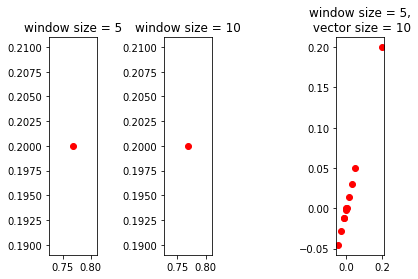

In [154]:
import matplotlib.pyplot as plt

plt.subplot(161)
plt.plot(f1_baseModel, f1_Model_5, 'ro')
plt.title("window size = 5")
plt.subplot(163)
plt.plot(f1_baseModel, f1_Model_10,'ro')
plt.title("window size = 10")
plt.subplot(166)
plt.plot(f1_Model_v105, f1_Model_v10,'ro')
plt.plot(vec_10_5, vec_10_,'ro')
plt.title("window size = 5,\n vector size = 10")
plt.show()